# Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
from matplotlib.ticker import MultipleLocator

# Load Dataframes

In [2]:
df_backscatter = pd.read_pickle(f"../data/pkl/df_backscatter.pkl.zst")
df_backscatter.head()

,Facebook,Cloudflare,Google
udp.payloadlength.int.fact,,,
0.028634,0.000031,NaN,NaN
0.030837,0.000079,NaN,0.00034
0.031571,0.000110,NaN,NaN
0.032305,0.000141,NaN,NaN
0.033040,0.000204,NaN,NaN


In [3]:
# let's use company new instead of app
df_backscatter = df_backscatter.rename(columns={"Facebook":"Meta"})

# Figure 9: QUIC amplification factor including resends

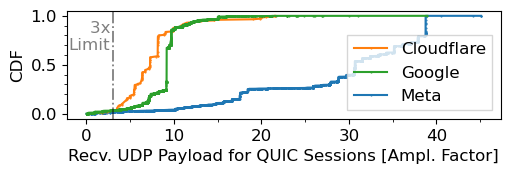

In [4]:
ax = df_backscatter.plot(figsize=(8*0.7,2*0.7), marker=".", markersize=1)

ax.set_ylabel(f"CDF")
ax.set_xlabel("Recv. UDP Payload for QUIC Sessions [Ampl. Factor]")

ax.axvline(3, c="black", linestyle="-.", alpha=0.5, linewidth=1.3)
ax.text(-2, 0.65, "    3x\nLimit", c="black", alpha=0.5)

ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(5))

handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[1],handles[2],handles[0],], 
          [labels[1],labels[2],labels[0],],
          fancybox=False, shadow=False)

fig = ax.get_figure()
fig.savefig(f"./plots/cdf_toolarge_ampl_factor_cdns.pdf", bbox_inches='tight')
fig.savefig(f"./plots/cdf_toolarge_ampl_factor_cdns.png", bbox_inches='tight', dpi=200)
plt.show()
plt.close(fig)